---

<div align="center">

# Particle Swarm Optimization From Scratch
</div>

---

This project focuses on developing the ``Particle Swarm Optimization (PSO) algorithm from scratch in Python``.

It contains the implementation of **core principles of PSO**, including **particles initialization**, **velocity updates**, and **position adjustments**, while allowing particles to ``converge towards optimal solutions`` based on the ``balance between exploration and exploitation``. 

Therefore, it involved coding PSO’s **key mechanics**, such as ``inertia``, ``cognitive and social components``, with the ultimate goal of creating a **flexible and efficient optimization tool** that can be applied to a variety of optimization problems.

---

<div align="center">
    
## Algorithm Overview
</div>

---

**Particle Swarm Optimization (PSO)** is an algorithm inspired by ``social behavior``, like how **birds flock** or **fish school**. It aims to find ``optimal solutions`` by iterating over potential candidates in a defined space. The process can be broken down into the following ``six steps``.

---

###  $\space\space\space\space$ Step #1 &#8594; Initialization
- A group of particles (potential solutions) is **randomly positioned** in the search space.
- Each particle has a **velocity vector** determining its movement.

### $\space\space\space\space$ Step #2 &#8594; Objective Function
- Particles aim to **minimize/maximize** a given function (``objective function``), which **evaluates** each particle’s position.

### $\space\space\space\space$ Step #3 &#8594; Velocity Update
- **Inertia**: Continues **particle's movement** in its current direction.
- **Cognitive Component**: Moves particle **toward its personal best position** $(p_{best})$.
- **Social Component**: Moves particle **toward the swarm's global best** $(g_{best}$).

> These components are weighted and random factors are introduced to avoid premature convergence.

$$V_{i}^{t+1} = w\space V_{i}^{t} + c_1 \space r_1 \space (P_{\text{best}_{(i)}}^{t} - P_{i}^{t}) + c_2 \space r_2 \space (P_{\text{best global}}^{t} - P_{i}^{t})$$

- _Where_:
  
  - $w$ is the **inertia weight**.
  - $c_1$ and $c_2$ are **cognitive** and **social coefficients**.
  - $r_1$ and $r_2$ are **random numbers**.
  - $P_{\text{best}(i)}$ is e particle’s **best known position**.
  - $P_{\text{best global}}$ is the **best known position globally**.

### $\space\space\space\space$ Step #4 &#8594; Position Update
- The velocity is used to **adjust each particle’s position**. It is performed based on the following formula:

$$P_{i}^{t+1} = P_{i}^{t} + V_{i}^{t+1}$$

- _Where_:
  
  - $P_{i}^{t+1}$ is the **new position of the particle**.
  
  - $V_{i}^{t+1}$ is the **updated velocity**.

### $\space\space\space\space$ Step #5 &#8594; Evaluation
- Each particle’s new position is ``evaluated``, **updating personal and global bests** if necessary.

### $\space\space\space\space$ Step #6 &#8594; Stopping Criteria
- The process continues until either the ``maximum number of iterations`` is reached or the ``swarm converges``.

> ## Key Parameters:
>- **Inertia Weight (w)**: Balances ``exploration`` and ``exploitation``.
>- **Cognitive (c1) & Social Coefficients (c2)**: Control how much ``influence personal and global bests have``.

---

<div align="center">
    
# [Python] Implementation
</div>

---

In [1]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
config = {
    'W':0.5,                   # Inertia (Initial Weights)
    'c1':0.8,                  # Cognitive / Personal Best based coefficient (Prioritizes Exploration since it only focuses on the personal's best solution)
    'c2':0.9,                  # Social / Global Best based coefficient (Prioritizes Exploitation since it only focuses on the team's best solution)
    'NumIterations': 1000,     # Number of Iterations to be performed
    'NumParticles': 50,        # Number of Particles to include within the search space
    'targetError': 1e-30,      # Minimum error that must be satisfied before stopping the search
    'plotIntervals': 5,        # Interval in which to plot the search space
    'plotxMin': -5,            # Min x value on the x axis of the plot
    'plotxMax': 5,             # Max x value on the x axis of the plot
    'plotyMin': -5,            # Min y value on the y axis of the plot
    'plotyMax': 5              # Max y value on the y axis of the plot
}

In [3]:
class Particle:
    def __init__(self) -> None:
        """
        # Description
            -> Constructor method which allows to create new instances of Particle
        := return: A new instance of Particle
        """
        # Initialize a random position
        x = (-1) ** bool(rnd.getrandbits(1)) * rnd.random() * 1000
        y = (-1) ** bool(rnd.getrandbits(1)) * rnd.random() * 1000
        self.position = np.array([x, y])

        # Initialize the particle's velocity [Static at first]
        self.velocity = np.array([0, 0])

        # Define the personal best position and value
        self.personalBestPosition = self.position
        self.personalBestValue = float('inf')

    def update(self) -> None:
        """
        # Description:
            -> The update method allows the particle to move by adding the velocity to the current position
        := return: None, since we are only updating the particle's position
        """
        # Update current position by adding the veocity
        self.position = self.position + self.velocity

In [4]:
class Environment():
    def __init__(self, target:int, config:dict) -> None:
        """
        # Description
            -> Constructor method which allows to create new instances of Space
        := param: target - Fitness Score to reach (The place where all the particles must converge to has the higher score)
        := param: config - Configuration to be used during the particles search
        := return: A new instance of Space
        """
        # Store all the given parameters
        self.target = target
        self.config = config

        # Create a list to store all the Particles
        self.particles = [Particle() for _ in range(self.config['NumParticles'])]

        # Define the initial global best position and value
        self.globalBestValue = float('inf')
        self.globalBestPosition = np.array([rnd.random() * 50, rnd.random() * 50])

    # In this implementation the objective function is give by: f = x^2 + y^2 + 1
    def fitness(self, particle:Particle) -> int:
        """
        # Description
            -> The fitness method is responsible for performing the fitness score evaluation according to the objective function
        := param: particle - Instance of the previously implemented Particle class
        := return: Fitness score of the given particle
        """
        x = particle.position[0]
        y = particle.position[1]
        f = x**2 + y**2 + 1
        return f

    def setPersonalBest(self) -> None:
        """
        # Description
            -> This method is responsible for Updating the particles personal best position and value if any was found
        := return: None, since it is updating the particles attributes
        """
        # Loop over the Particles
        for particle in self.particles:
            # Calculate the fitness score of the current particle
            fitnessScore = self.fitness(particle)

            # Found a particle that lead to a better result (lead to a better fitnessScore) 
            if (particle.personalBestValue > fitnessScore):
                # Update personal best value and position
                particle.personalBestValue = fitnessScore
                particle.personalBestPosition = particle.position

    def setGlobalBest(self) -> None:
        """
        # Description:
            -> The setGlobalBest method updates the global best value and position if any was found
        := return: None, since it is only updating values
        """
        # Loop over the particles
        for particle in self.particles:
            # Calculate current particle fitness score
            bestFitnessScore = self.fitness(particle)

            # Check if the current fitness score is better than the global one 
            if (self.globalBestValue > bestFitnessScore):
                # Update the Global best variables
                self.globalBestValue = bestFitnessScore
                self.globalBestPosition = particle.position

    def updateParticles(self) -> None:
        """
        # Description
            -> This method updates the particle's position according to a new calculated velocity
        := return: None, since it is only updating the particles position and velocity
        """
        # Loop over the Particles
        for particle in self.particles:
            # Calculate the inertia according to the particle's velocity
            inertia = self.config['W'] * particle.velocity

            # Calculate self and swarm confidences
            selfConfidence = self.config['c1'] * rnd.random() * (particle.personalBestPosition - particle.position)
            swarmConfidence = self.config['c2'] * rnd.random() * (self.globalBestPosition - particle.position)

            # Get a new velocity
            newVelocity = inertia + selfConfidence + swarmConfidence

            # Update the particle's velocity and position
            particle.velocity = newVelocity
            particle.update()

    def showParticles(self, iteration:int) -> None:
        """
        # Description
            -> The showParticles method creates a plot to visualize the particles position within a given iteration
        := return: None, since it is only plotting the particles data
        """
        # Print current iteration and the corresponding global values
        print(f"\n{iteration} iteration(s)")
        print(f"[Current Best Position] : {self.globalBestPosition}")
        print(f"[Current Best Value / Fitness Score] : {self.globalBestValue}")

        # Loop over the particles and add their data into the plot
        for particle in self.particles:
            plt.plot(particle.position[0], particle.position[1], 'ro')
        plt.plot(self.globalBestPosition[0], self.globalBestPosition[1], 'bo')
        
        # Set the limits for x and y axes to keep the scale constant
        plt.xlim(self.config['plotxMin'], self.config['plotxMax'])
        plt.ylim(self.config['plotyMin'], self.config['plotyMax'])

        # Show the plot
        plt.show()

    def performSearch(self) -> None:
        """
        # Description
            -> This method is responsible for performing search with the particles towards the goal
        := param: NumIterations - Number of iterations to be performed
        := return: None, due to the fact that we are merely performing search with the particles towards a common goal
        """
        # Perform <NumInterations> iterations
        for iteration in range(self.config['NumIterations']):
            # Set particles best and global best 
            self.setPersonalBest()
            self.setGlobalBest()

            # Plot the current iteration
            if ((iteration + 1) % self.config['plotIntervals'] == 0):
                self.showParticles(iteration)

            # Check if the current error is small enough and therefore stop the iterations
            if (abs(self.globalBestValue - self.target) <= self.config['targetError']):
                print(f"[Global Best Position] : {self.globalBestPosition} -> Found in {iteration + 1} iteration(s)")
                return

            # Update particles
            self.updateParticles()

        # Print the best solution
        print(f"[Global Best Position] : {self.globalBestPosition} -> Found in {self.config['NumIterations'] + 1} iteration(s)")


4 iteration(s)
[Current Best Position] : [-5.50843973  6.0995446 ]
[Current Best Value / Fitness Score] : 68.54735258041443


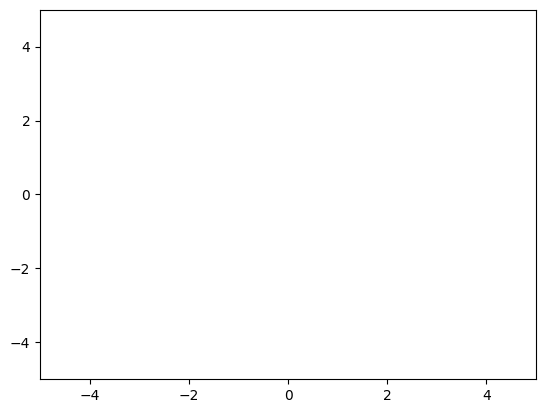


9 iteration(s)
[Current Best Position] : [-0.22480836  1.16059976]
[Current Best Value / Fitness Score] : 2.3975305923559684


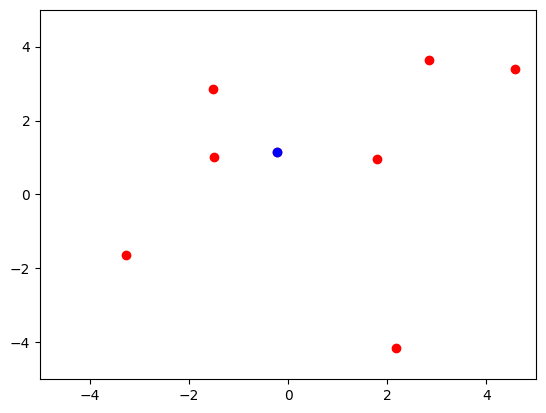


14 iteration(s)
[Current Best Position] : [0.12137282 0.11605058]
[Current Best Value / Fitness Score] : 1.028199099465028


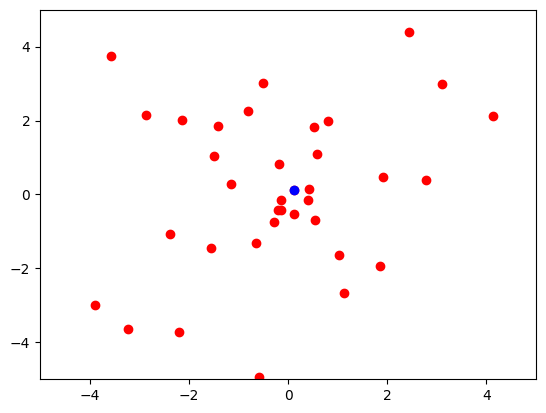


19 iteration(s)
[Current Best Position] : [ 0.02004421 -0.00326672]
[Current Best Value / Fitness Score] : 1.000412441989766


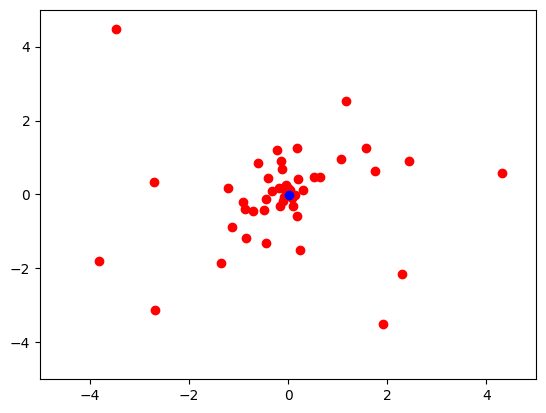


24 iteration(s)
[Current Best Position] : [0.01104612 0.00143852]
[Current Best Value / Fitness Score] : 1.0001240860222709


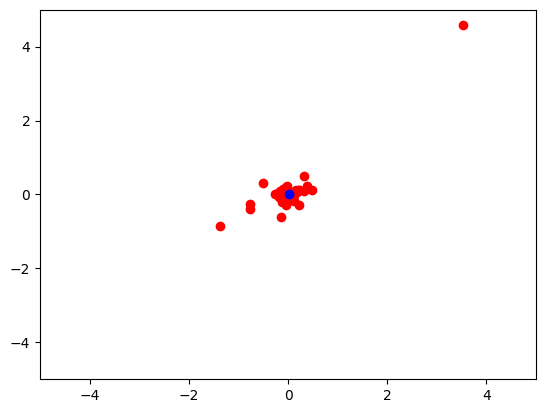


29 iteration(s)
[Current Best Position] : [-0.00086484 -0.00067526]
[Current Best Value / Fitness Score] : 1.000001203927237


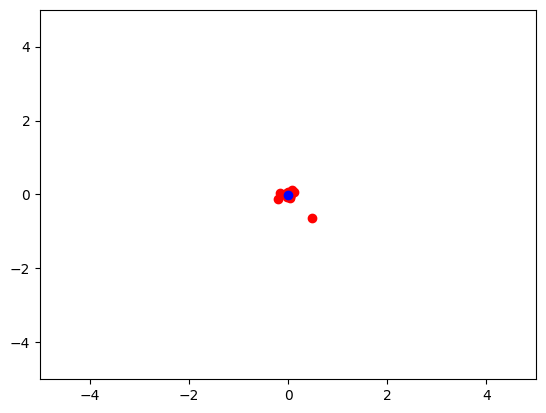


34 iteration(s)
[Current Best Position] : [-4.69103568e-05  2.17739757e-05]
[Current Best Value / Fitness Score] : 1.0000000026746876


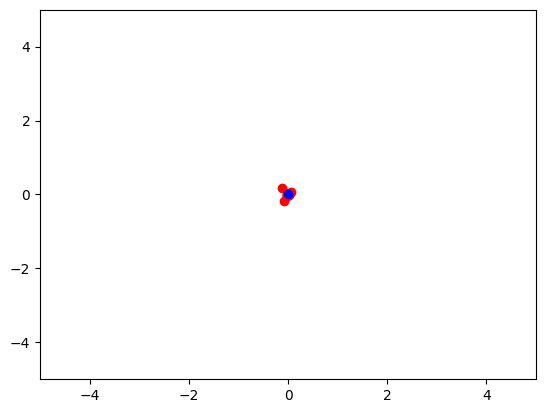


39 iteration(s)
[Current Best Position] : [-9.85340009e-06 -2.48816013e-05]
[Current Best Value / Fitness Score] : 1.0000000007161836


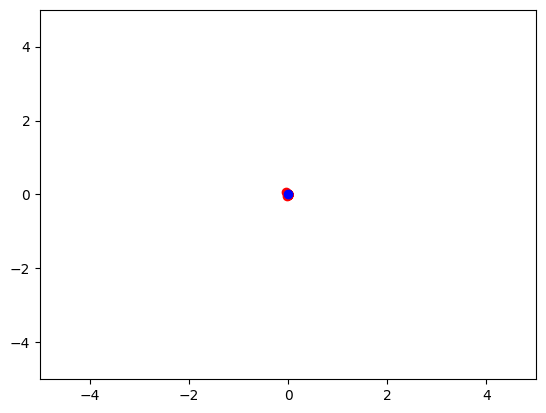


44 iteration(s)
[Current Best Position] : [-3.70791886e-06 -1.10472429e-06]
[Current Best Value / Fitness Score] : 1.0000000000149691


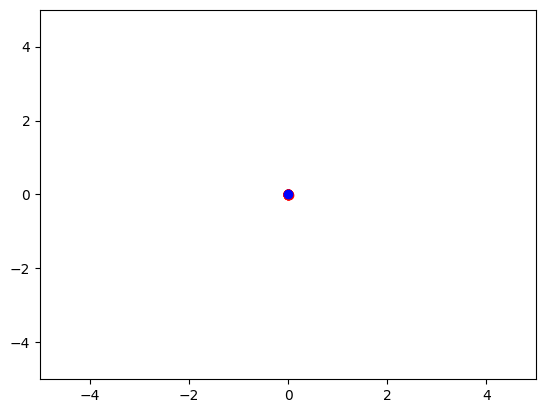


49 iteration(s)
[Current Best Position] : [-9.24532756e-07  1.77284591e-07]
[Current Best Value / Fitness Score] : 1.0000000000008862


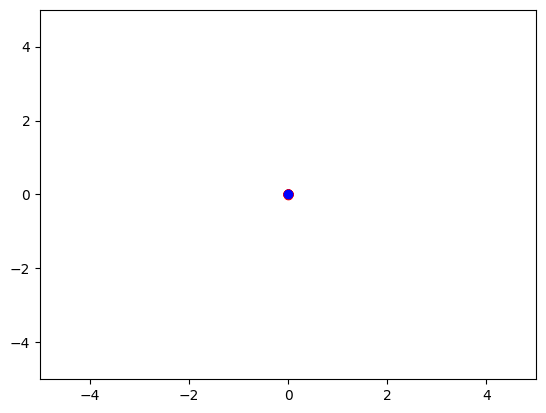


54 iteration(s)
[Current Best Position] : [-8.68708765e-08  2.67446775e-08]
[Current Best Value / Fitness Score] : 1.0000000000000082


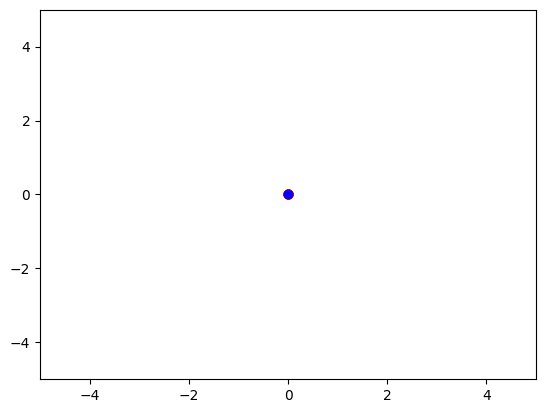


59 iteration(s)
[Current Best Position] : [-7.88524000e-10 -1.92823893e-08]
[Current Best Value / Fitness Score] : 1.0000000000000004


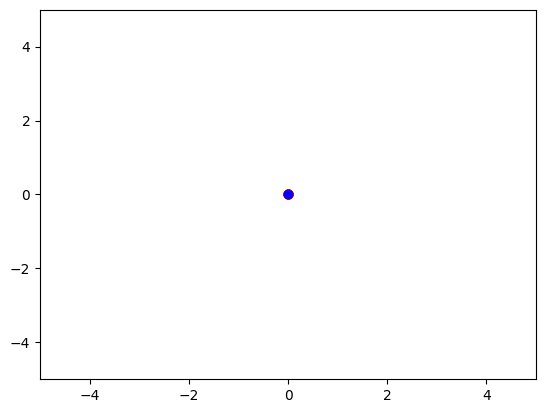

[Global Best Position] : [-5.69139583e-11 -8.05176524e-09] -> Found in 61 iteration(s)


In [5]:
searchSpace = Environment(1, config)
searchSpace.performSearch()